# Getting the Data

In [2]:
from pycaret.datasets import get_data
data = get_data('kiva')

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [3]:
#check the shape of data
data.shape

(6818, 7)

In [5]:
# sampling the data to select only 1000 documents
data = data.sample(1000, random_state=786).reset_index(drop=True)
data.shape

(1000, 7)

# Setting up Environment in PyCaret

It takes two parameters: pandas dataframe and name of the text column passed as target parameter. You can also pass a list containing text, in which case you don't need to pass target parameter. When setup is executed, following pre-processing steps are applied automatically:

Removing Numeric Characters: All numeric characters are removed from the text. They are replaced with blanks.

Removing Special Characters: All non-alphanumeric special characters are removed from the text. They are also replaced with blanks.

Word Tokenization: Word tokenization is the process of splitting a large sample of text into words. This is the core requirement in natural language processing tasks where each word needs to be captured separately for further analysis. Read More

Stopword Removal: A stop word (or stopword) is a word that is often removed from text because it is common and provides little value for information retrieval, even though it might be linguistically meaningful. Example of such words in english language are: "the", "a", "an", "in" etc. Read More

Bigram Extraction: A bigram is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables, or words. For example: word New York is captured as two different words "New" and "York" when tokenization is performed but if it is repeated enough times, Bigram Extraction will represent the word as one i.e. "New_York" Read More

Trigram Extraction: Similar to bigram extraction, trigram is a sequence of three adjacent elements from a string of tokens. Read More

Lemmatizing: Lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single word, identified by the word's lemma, or dictionary form. In English language, word appears in several inflected forms. For example the verb 'to walk' may appear as 'walk', 'walked', 'walks', 'walking'. The base form, 'walk', that one might look up in a dictionary, is called the lemma for the word. Read More

Custom Stopwords: Many times text contains words that are not stopwords by the rule of language but they add no or very little information. For example, in this tutorial we are using the loan dataset. As such, words like "loan", "bank", "money", "business" are too obvious and adds no value. More often than not, they also add a lot of noise in the topic model. You can remove those words from corpus by using custom_stopwords parameter. In next tutorial, Natural Language Processing Tutorial (NLP102) - Level Intermediate we will demonstrate the use of custom_stopwords parameter inside setup().


In [8]:
from pycaret.nlp import *
exp_nlp101 = setup(data = data, target = 'en', session_id = 123)

Description,Value
session_id,123
Documents,1000
Vocab Size,4615
Custom Stopwords,False


 Documents : Number of documents (or samples in dataset if dataframe is passed).

Vocab Size : Size of vocabulary in the corpus after applying all text pre-processing such as removal of stopwords, bigram/trigram extraction, lemmatization etc.

all text pre-processing steps are performed automatically when you execute setup()

# Create a Topic Model

 In machine learning and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. Intuitively, given that a document is about a particular topic, one would expect particular words to appear in the document more or less frequently: "dog" and "bone" will appear more often in documents about dogs, "cat" and "meow" will appear in documents about cats, and "the" and "is" will appear equally in both. A document typically concerns multiple topics in different proportions; thus, in a document that is 10% about cats and 90% about dogs, there would probably be about 9 times more dog words than cat words. The "topics" produced by topic modeling techniques are clusters of similar words.
 
 
 Creating a topic model in PyCaret is simple and similar to how you would have created a model in supervised modules of pycaret. A topic model is created using create_model() function which takes one mandatory parameter i.e. name of model as a string. This function returns a trained model object. There are 5 topic models available in PyCaret. see the docstring of create_model() for complete list of models. See an example below where we create Latent Dirichlet Allocation (LDA) model:

In [9]:
lda = create_model('lda')

In [10]:
print(lda)

LdaModel(num_terms=4615, num_topics=4, decay=0.5, chunksize=100)


In [12]:
lda2 = create_model('lda', num_topics = 6, multi_core = True)
print(lda2)

LdaModel(num_terms=4615, num_topics=6, decay=0.5, chunksize=100)


# Assign a Model

assign the topic proportions to our dataset (6818 documents / samples) to analyze the results. We will achieve this by using assign_model() function.

In [14]:
lda_results = assign_model(lda)
lda_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Ecuador,store sell article necessity school supply sto...,M,1050,partner,Retail,0,0.000378,0.004196,0.990430,0.004997,Topic 2,0.99
1,Ecuador,year old married mother child child still stil...,F,550,lender,Food,1,0.000240,0.002589,0.568185,0.428987,Topic 2,0.57
2,Kenya,year old marry kid grade young child still bab...,F,1000,lender,Services,1,0.000474,0.594569,0.347255,0.057702,Topic 1,0.59
3,Dominican Republic,year old son daughter twentie make curtain dec...,F,250,partner,Retail,0,0.000579,0.006191,0.718684,0.274545,Topic 2,0.72
4,Kenya,year old live life purity good moral founder g...,F,150,lender,Agriculture,1,0.000482,0.977193,0.015058,0.007267,Topic 1,0.98


 6 additional columns are now added to the dataframe. en is the text after all pre-processing. Topic_0 ... Topic_3 are the topic proportions and represents the distribution of topics for each document. Dominant_Topic is the topic number with highest proportion and Perc_Dominant_Topic is the percentage of dominant topic over 1 (only shown when models are stochastic i.e. sum of all proportions equal to 1) .

# Plot a Model

plot_model() function can be used to analyze the overall corpus or only specific topics extracted through topic model. Hence the function plot_model() can also work without passing any trained model object. 

## Frequency Distribution of Entire Corpus

In [16]:
plot_model()


## Top 100 Bigrams on Entire Corpus

In [18]:
plot_model(plot = 'bigram')

## Frequency distrubtion of topic 1

In [19]:
plot_model(lda, plot='frequency', topic_num = 'Topic 1')

## Topic Distribution

In [21]:
plot_model(lda, plot = 'topic_distribution')

Each document is a distribution of topics and not a single topic. Although, if the task is of categorizing document into specific topics, it wouldn't be wrong to use the topic proportion with highest value to categorize the document into a topic. In above plot, each document is categorized into one topic using the largest proportion of topic weights. We can see most of the documents are in Topic 3 with only few in Topic 1. If you hover over these bars, you will get basic idea of themes in this topic by looking at the keywords. For example if you evaluate Topic 2, you will see keywords words like 'farmer', 'rice', 'land', which probably means that the loan applicants in this category pertains to agricultural/farming loans. However, if you hover over Topic 0 and Topic 3 you will observe lot of repitions and keywords are overlapping in all topics such as word "loan" and "business" appears both in Topic 0 and Topic 3.

## T-distributed Stochastic Neighbor Embedding (t-SNE)

In [22]:
plot_model(lda, plot = 'tsne')

T-distributed Stochastic Neighbor Embedding (t-SNE) is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions.

## Uniform Manifold Approximation and Projection Plot

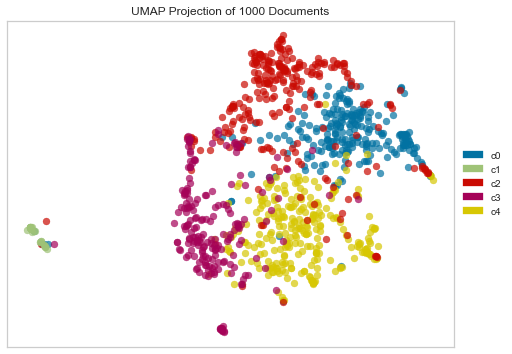

In [23]:
plot_model(lda, plot = 'umap')